<a href="https://colab.research.google.com/github/TMhdSofyan/KAUST-Hackathon-EnergyHarvest/blob/main/01_Exercise_RandomForest_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
! pip install jcopml

In [3]:
import imageio
import numpy as np
import pandas as pd 
from pathlib import Path 
import matplotlib.pyplot as plt 
from IPython.display import Image
import seaborn as sns
import time

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error

In [4]:
# Load parameter data 
df_param = pd.read_csv('/content/drive/MyDrive/00_History_Matching/Data/parameters.csv')

# Load production data 
df_ts = pd.read_csv('/content/drive/MyDrive/00_History_Matching/Data/production.csv')

In [5]:
# find the cumulitive production of each year

x = df_ts['years']
y = df_ts['oil_prod_cum']
tms = 0
oil_prod_cum = []
years = []
case_num = []
cases = df_ts['case_num'].unique()
for case in cases:
    for year in range(0,11):
        oil_prod_cum.append(np.interp(year, x[tms:tms+121],y[tms:tms+121]))
        years.append(year)
        case_num.append(case)
    tms+=121

In [6]:
# find the  oil_prod_rate of each year
x2 = df_ts['years']
y2 = df_ts['oil_prod_rate']
tms = 0
oil_prod_rate = []
cases = df_ts['case_num'].unique()
for case in cases:
    for year in range(0,11):
        oil_prod_rate.append(np.interp(year, x2[tms:tms+121],y2[tms:tms+121]))
    tms+=121

In [7]:
column_names = [ 'case_num', 'years','oil_prod_cum','oil_prod_rate']
df_validation = pd.DataFrame(columns = column_names)
df_validation['oil_prod_cum']=oil_prod_cum
df_validation['case_num']=case_num
df_validation['years']=years
df_validation['oil_prod_rate']=oil_prod_rate

In [19]:
df_validation.head()

,case_num,years,oil_prod_cum,oil_prod_rate
0,0,0,0.000000e+00,0.000000
1,0,1,5.102400e+06,7043.058708
2,0,2,6.653018e+06,2864.340000
3,0,3,7.489690e+06,2008.434194
4,0,4,8.180167e+06,1833.900323


In [8]:
df_validation_final = df_validation

Kh_Kv = []
inj_rate = []
permeability = []
porosity = []
prod_bhp = []
thickness = []
category = []

for cases in df_validation_final['case_num']:   
        Kh_Kv.append(df_param['Kh_Kv'][cases])
        inj_rate.append(df_param['inj_rate'][cases])
        permeability.append(df_param['permeability'][cases])
        porosity.append(df_param['porosity'][cases])
        prod_bhp.append(df_param['prod_bhp'][cases])
        thickness.append(df_param['thickness'][cases])
        category.append(df_param['category'][cases])

In [9]:
df_validation_final['Kh_Kv']=Kh_Kv
df_validation_final['inj_rate']=inj_rate
df_validation_final['permeability']=permeability
df_validation_final['porosity']=porosity
df_validation_final['prod_bhp']=prod_bhp
df_validation_final['thickness']=thickness
df_validation_final['category']=category

In [10]:
df_validation_final.head(200)

,case_num,years,oil_prod_cum,oil_prod_rate,Kh_Kv,inj_rate,permeability,porosity,prod_bhp,thickness,category
0,0,0,0.000000e+00,0.000000,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,train
1,0,1,5.102400e+06,7043.058708,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,train
2,0,2,6.653018e+06,2864.340000,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,train
3,0,3,7.489690e+06,2008.434194,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,train
4,0,4,8.180167e+06,1833.900323,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,train
...,...,...,...,...,...,...,...,...,...,...,...
195,17,8,9.664956e+06,2841.432903,74.939245,2630.220945,84.515308,0.201703,241.875896,11.830595,train
196,17,9,1.069659e+07,2815.380000,74.939245,2630.220945,84.515308,0.201703,241.875896,11.830595,train
197,17,10,1.172053e+07,2797.595161,74.939245,2630.220945,84.515308,0.201703,241.875896,11.830595,train
198,18,0,0.000000e+00,0.000000,82.370434,1216.399525,406.543609,0.154642,833.660120,84.774855,train


In [14]:
# Save df
file_path = '/content/drive/MyDrive/00_History_Matching/Data/df_merged_Version2.csv'
df_validation_final.to_csv(file_path, index=False)

In [54]:
df = df_validation_final.copy()

In [55]:
df.head()

,case_num,years,oil_prod_cum,oil_prod_rate,Kh_Kv,inj_rate,permeability,porosity,prod_bhp,thickness,category
0,0,0,0.000000e+00,0.000000,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,train
1,0,1,5.102400e+06,7043.058708,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,train
2,0,2,6.653018e+06,2864.340000,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,train
3,0,3,7.489690e+06,2008.434194,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,train
4,0,4,8.180167e+06,1833.900323,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,train


In [56]:
train = df.loc[df['category'] == 'train']
test = df.loc[df['category'] == 'test']

In [57]:
train.drop(columns = ['category', 'oil_prod_rate'], inplace = True)
test.drop(columns = ['category', 'oil_prod_rate'], inplace = True)

<ipython-input-57-7c13716b556b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns = ['category', 'oil_prod_rate'], inplace = True)
<ipython-input-57-7c13716b556b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns = ['category', 'oil_prod_rate'], inplace = True)


In [58]:
X_train = train.drop(columns="oil_prod_cum")
y_train = train['oil_prod_cum']

X_test = test.drop(columns="oil_prod_cum")
y_test = test['oil_prod_cum']

# Concatenate the rows
X = pd.concat([X_train, X_test])

# Reset the index
X = X.reset_index(drop=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8800, 8) (2200, 8) (8800,) (2200,)


In [39]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gs
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust', transform='yeo-johnson'), X.columns)
])

from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

model_RF = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=30, n_jobs=-1, verbose=1, random_state=42)
model_RF.fit(X_train, y_train)

print(model_RF.best_params_)
print(model_RF.score(X_train, y_train), model_RF.best_score_, model_RF.score(X_test, y_test))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/jcopml/pipeline/_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


{'algo__max_depth': 71, 'algo__max_features': 0.6331731119758383, 'algo__min_samples_leaf': 3, 'algo__n_estimators': 200}
0.9983118758086683 0.9767339522010898 0.979526116072283


In [60]:
file_path = '/content/drive/MyDrive/00_History_Matching/Model_/model_RF_V2.pkl'

import joblib

# Save the trained model to a file
joblib.dump(model_RF, file_path)

['/content/drive/MyDrive/00_History_Matching/Model_/model_RF_V2.pkl']

In [61]:
file_path = '/content/drive/MyDrive/00_History_Matching/Model_/model_RF_best_estimator_V2.pkl'

# Save the trained model to a file
joblib.dump(model_RF.best_estimator_, file_path)

['/content/drive/MyDrive/00_History_Matching/Model_/model_RF_best_estimator_V2.pkl']

In [62]:
# Obtain predictions for the test dataset
y_test_pred = model_RF.predict(X_test)

In [63]:
comparison_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
comparison_test_df.head()

,Actual,Predicted
99,0.000000e+00,7.669304e+03
100,4.747688e+06,4.759464e+06
101,6.818705e+06,6.993418e+06
102,7.955320e+06,7.989559e+06
103,8.758568e+06,8.967325e+06


In [64]:
# Concatenate comparison_df with X_test
concatenated_test_df = pd.concat([X_test, comparison_test_df], axis=1)

concatenated_test_df.head()

,case_num,years,Kh_Kv,inj_rate,permeability,porosity,prod_bhp,thickness,Actual,Predicted
99,9,0,42.494315,1671.382942,259.124329,0.229653,302.130499,17.101153,0.000000e+00,7.669304e+03
100,9,1,42.494315,1671.382942,259.124329,0.229653,302.130499,17.101153,4.747688e+06,4.759464e+06
101,9,2,42.494315,1671.382942,259.124329,0.229653,302.130499,17.101153,6.818705e+06,6.993418e+06
102,9,3,42.494315,1671.382942,259.124329,0.229653,302.130499,17.101153,7.955320e+06,7.989559e+06
103,9,4,42.494315,1671.382942,259.124329,0.229653,302.130499,17.101153,8.758568e+06,8.967325e+06


In [65]:
# Obtain predictions for the training dataset
y_train_pred = model_RF.predict(X_train)

In [66]:
comparison_train_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
comparison_train_df.head()

,Actual,Predicted
0,0.000000e+00,3.700393e+04
1,5.102400e+06,5.274850e+06
2,6.653018e+06,6.828012e+06
3,7.489690e+06,7.611518e+06
4,8.180167e+06,8.368764e+06


In [67]:
# Concatenate comparison_df with X_test
concatenated_train_df = pd.concat([X_train, comparison_train_df], axis=1)

concatenated_train_df.head()

,case_num,years,Kh_Kv,inj_rate,permeability,porosity,prod_bhp,thickness,Actual,Predicted
0,0,0,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,0.000000e+00,3.700393e+04
1,0,1,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,5.102400e+06,5.274850e+06
2,0,2,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,6.653018e+06,6.828012e+06
3,0,3,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,7.489690e+06,7.611518e+06
4,0,4,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,8.180167e+06,8.368764e+06


In [68]:
# Combine the rows of concatenated_train_df and concatenated_test_df
combined_df = pd.concat([concatenated_train_df, concatenated_test_df])

# Reset the index of the combined DataFrame
combined_df = combined_df.reset_index(drop=True)


combined_df.head()

,case_num,years,Kh_Kv,inj_rate,permeability,porosity,prod_bhp,thickness,Actual,Predicted
0,0,0,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,0.000000e+00,3.700393e+04
1,0,1,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,5.102400e+06,5.274850e+06
2,0,2,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,6.653018e+06,6.828012e+06
3,0,3,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,7.489690e+06,7.611518e+06
4,0,4,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,8.180167e+06,8.368764e+06


In [ ]:
# Get unique values in the "case_num" column
unique_cases = combined_df['case_num'].unique()

# Initialize an empty DataFrame to store the sorted data
sorted_df = pd.DataFrame()

# Iterate over each unique case_num
for case in unique_cases:
    # Filter the data for the current case_num
    case_data = combined_df[combined_df['case_num'] == case]
    # Sort the data based on the "days" column
    sorted_case_data = case_data.sort_values(by="years")
    # Drop the first row from the sorted data
    sorted_case_data = sorted_case_data.drop(sorted_case_data.index[0])
    # Append the sorted data to the overall sorted DataFrame
    sorted_df = sorted_df.append(sorted_case_data, ignore_index=True)

# Print the updated dataset
print(sorted_df)

In [82]:
sorted_df[sorted_df['case_num'] == 3]

,case_num,years,Kh_Kv,inj_rate,permeability,porosity,prod_bhp,thickness,Actual,Predicted
30,3,1,88.322302,2242.513803,427.275505,0.13753,976.777682,37.443929,7.590730e+06,7.980435e+06
31,3,2,88.322302,2242.513803,427.275505,0.13753,976.777682,37.443929,8.897880e+06,9.210638e+06
32,3,3,88.322302,2242.513803,427.275505,0.13753,976.777682,37.443929,9.773235e+06,9.729462e+06
33,3,4,88.322302,2242.513803,427.275505,0.13753,976.777682,37.443929,1.061813e+07,1.051775e+07
34,3,5,88.322302,2242.513803,427.275505,0.13753,976.777682,37.443929,1.146096e+07,1.132818e+07
35,3,6,88.322302,2242.513803,427.275505,0.13753,976.777682,37.443929,1.230359e+07,1.241334e+07
36,3,7,88.322302,2242.513803,427.275505,0.13753,976.777682,37.443929,1.314618e+07,1.311413e+07
37,3,8,88.322302,2242.513803,427.275505,0.13753,976.777682,37.443929,1.398876e+07,1.409408e+07
38,3,9,88.322302,2242.513803,427.275505,0.13753,976.777682,37.443929,1.483129e+07,1.486401e+07
39,3,10,88.322302,2242.513803,427.275505,0.13753,976.777682,37.443929,1.567385e+07,1.515771e+07


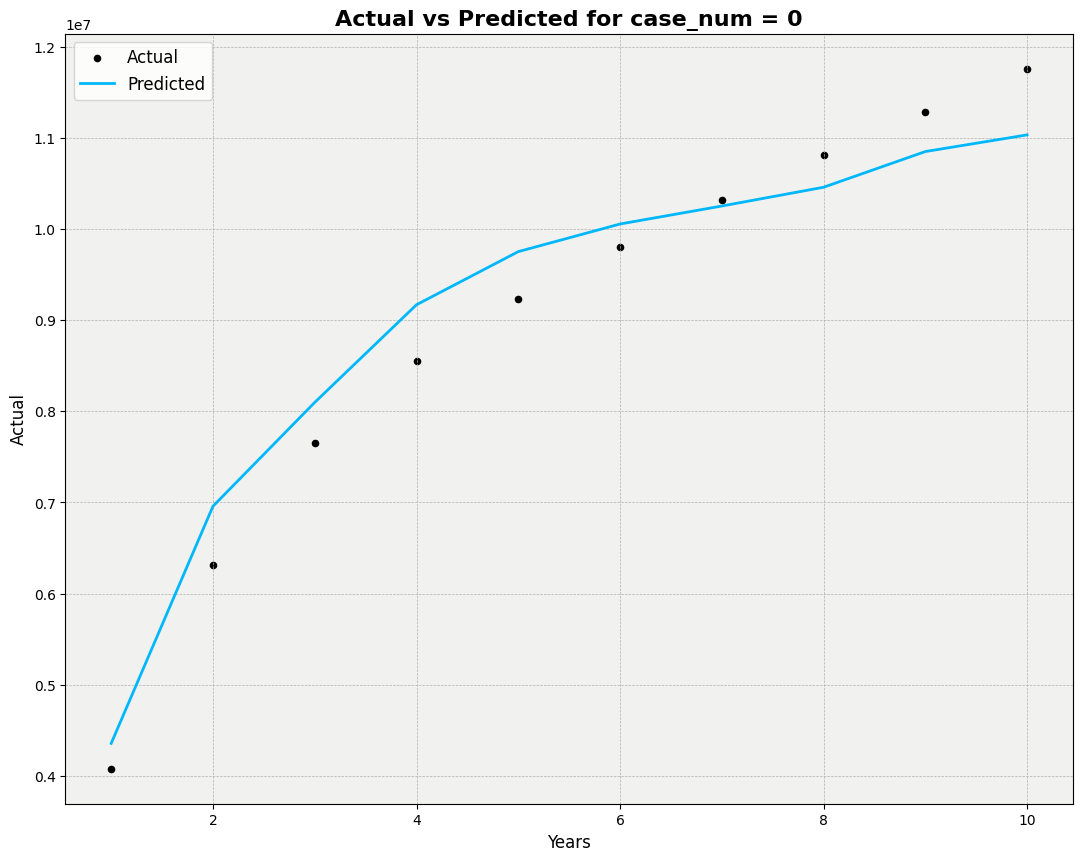

In [86]:
plot_1 = sorted_df[sorted_df['case_num'] == 13]

# Create the line plot
fig, ax1 = plt.subplots(figsize=(13, 10))

# Plot scatter for "Actual" column
ax1.scatter(plot_1['years'], plot_1['Actual'], color='black', s=20, label='Actual', marker='o')

# Plot line for "Predicted" column
ax1.plot(plot_1['years'], plot_1['Predicted'], color='#00b7fb', linewidth=2, label='Predicted')

ax1.set_xlabel('Years', fontsize=12)
ax1.set_ylabel('Actual', fontsize=12)

# Add gridlines
ax1.grid(True, linestyle='--', linewidth=0.5)

# Customize the title font size and style
plt.title('Actual vs Predicted for case_num = 0', fontsize=16, fontweight='bold')

# Customize the legend font size
plt.legend(loc='upper left', fontsize=12)

# Customize the tick label font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a background color
ax1.set_facecolor('#F1F2F0')

plt.show()

In [ ]:
# Get unique values in the "case_num" column
unique_cases = sorted_df['case_num'].unique()

# Iterate over each unique case_num
for case in unique_cases:
    # Filter the data for the current case_num
    case_data = sorted_df[sorted_df['case_num'] == case]
    
    # Create a new figure for each case_num
    fig, ax1 = plt.subplots(figsize=(13, 10))
    
    # Plot scatter for "Actual" column
    ax1.scatter(case_data['days'], case_data['Actual'], s=10, color='#39ACE7', label='Actual')
    
    # Plot line for "Predicted" column
    ax1.plot(case_data['days'], case_data['Predicted'], color='black', label='Predicted')

    ax1.set_xlabel('Days', fontsize=12)
    ax1.set_ylabel('Actual', fontsize=12)

    # Add gridlines
    ax1.grid(True, linestyle='--', linewidth=0.5)

    # Customize the title font size and style
    plt.title(f'Actual vs Predicted for case_num = {case}', fontsize=16, fontweight='bold')

    # Customize the legend font size
    plt.legend(loc='upper left', fontsize=12)

    # Customize the tick label font size
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Add a background color
    ax1.set_facecolor('#F1F2F0')

    plt.show()